In [5]:
import os
# import zipfile
dog_dir = os.path.join('F:/tmp/cat_dog/training/dogs')
cat_dir = os.path.join('F:/tmp/cat_dog/training/cats')

print('total training dog images:', len(os.listdir(dog_dir)))
print('total training cat images:', len(os.listdir(cat_dir)))

dog_files = os.listdir(dog_dir)
print(dog_files[:10])

cat_files = os.listdir(cat_dir)
print(cat_files[:10])

total training dog images: 8000
total training cat images: 8000
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1004.jpg', '1005.jpg', '1006.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg']


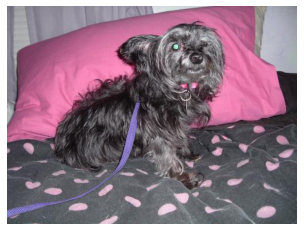

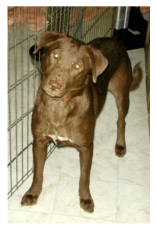

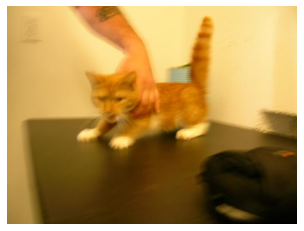

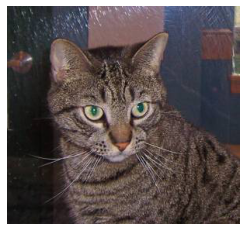

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dog = [os.path.join(dog_dir, fname) 
                for fname in dog_files[pic_index-2:pic_index]]
next_cat = [os.path.join(cat_dir, fname) 
                for fname in cat_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dog+next_cat):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "F:/tmp/cat_dog/training/"
training_datagen = ImageDataGenerator(   # 训练集预处理（数据增强）
      rescale = 1./255,  # 归一化
	  rotation_range=40,  # 旋转
      width_shift_range=0.2, # 水平平移
      height_shift_range=0.2, #垂直平移
      shear_range=0.2, # 剪切
      zoom_range=0.2, # 缩放
      horizontal_flip=True, # 翻转
      fill_mode='nearest') # 临近填充

VALIDATION_DIR = "F:/tmp/cat_dog/testing/"
validation_datagen = ImageDataGenerator(rescale = 1./255) # 仅归一化

train_generator = training_datagen.flow_from_directory(    # 大小调整为（150，150）
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'  # classes 默认从子文件夹名称/结构自动推断通过属性class_indices可获得文件夹名与类的序号的对应字典。
                                # class_mode 返回2D的one-hot编码标签
)

validation_generator = validation_datagen.flow_from_directory(    # 大小调整为（150，150）
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([                                   # 网络定义，卷积——池化——卷积——池化——卷积——池化——卷积——池化——全连接——输出2两类（猫or狗）
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()                  # 神经网络结构可视化

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
            # loss 损失函数：交叉熵         # optimizer 学习步长            # metrics 性能：准确度
history = model.fit_generator(train_generator, epochs=5, validation_data = validation_generator, verbose = 1)
                                # 学习步长             #                # verbose 记录日志
# model.save("catdog.h5")
   # 模型保存为 catdog.h5

D:\PPPanghao\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\PPPanghao\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\PPPanghao\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\PPPanghao\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dty

Found 16000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
___________________________________________________

D:\PPPanghao\anaconda3\envs\py37\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


500/500 [==============================] - 300s 600ms/step - loss: 0.7014 - acc: 0.5473 - val_loss: 0.6831 - val_acc: 0.5045
Epoch 2/5
500/500 [==============================] - 221s 441ms/step - loss: 0.6510 - acc: 0.6269 - val_loss: 0.6043 - val_acc: 0.6790
Epoch 3/5
500/500 [==============================] - 222s 444ms/step - loss: 0.6168 - acc: 0.6694 - val_loss: 0.5558 - val_acc: 0.7080
Epoch 4/5
500/500 [==============================] - 223s 446ms/step - loss: 0.5964 - acc: 0.6859 - val_loss: 0.5875 - val_acc: 0.6630
Epoch 5/5
500/500 [==============================] - 222s 443ms/step - loss: 0.5751 - acc: 0.7024 - val_loss: 0.4868 - val_acc: 0.7660


In [9]:
from PIL import Image

#  待处理图片路径
image = Image.open("./cd/cat.jpg")
#  resize图片大小，入口参数为一个tuple，新的图片的大小
img_size = image.resize((150,150))
image = img_size
#  处理图片后存储路径，以及存储格式
img_size.save('./cd/catt.jpg', 'jpeg')

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt  # plt 用于显示图片
import matplotlib.image as mpimg  # mpimg 用于读取图片

image = mpimg.imread("./cd/catt.jpg")
print(image.shape)
image = image.reshape(1,150,150,3)/255
# image=image/255
c = model.predict(image,batch_size=1)
print(c)

(150, 150, 3)
[[0.69656205 0.30343798]]
